# Notebook - Solving Differential Equations Numerically


## Part 1 - Euler's Method

In [1]:
import sympy as sy
sy.init_printing() # display better looking symbols in Jupyter notebooks
import numpy as np
import matplotlib.pyplot as plt


delta_t 3.0


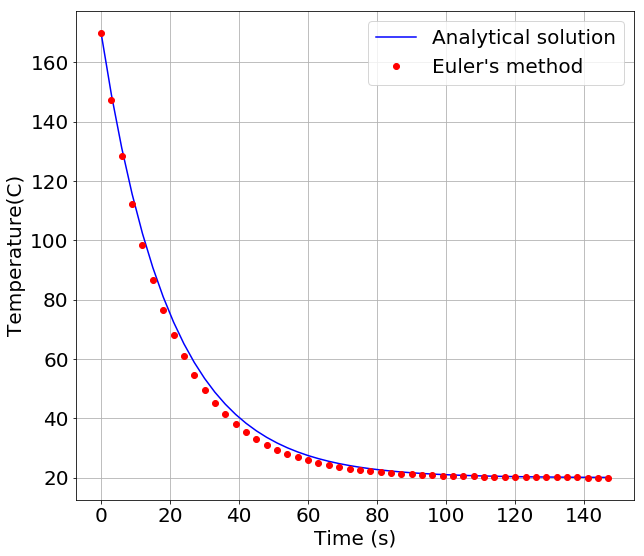

In [11]:
# Perform the Euler method to numerical solve a differential equation (Newton's heat equation)
#    given some starting condition

# Function which finds the slope 
#  for a given time and temperature
def f_euler(t,k,T_env,T):
    myf = -k * ( T - T_env )
    #print(t, T, myf)
    return myf

# Function which evaluates the analytical solution
#  for a given time 
def f_ana(t,k,T_env,T_0):
    analytical_f = T_env + ( T_0 - T_env )*np.exp(-k*t)
    return analytical_f


# Set time range (minutes)
a = 0.0
b = 150.0

# Set number of time divisions and step size delta_t
N = 50
delta_t = (b-a)/N
print("delta_t",delta_t)

# Define the initital temperature, the environment temperature, and the constant
T_0 = 170  # C
T_env = 20 # C
k = 0.05 # /min

# Array of time
tpoints  = np.arange(a,b,delta_t)

# Empty lists to store temperature
Tpoints_euler  = []
Tpoints_ana    = []

# Start the process at t=0
Temp = T_0

for t in tpoints:
    
    # put the temperatures for this time
    #  iteration into the array
    Tpoints_euler.append(Temp)
    Tpoints_ana.append( f_ana(t,k,T_env,T_0) )
        
    # Use the current time and temperature
    #  and the differential equation to find the slope
    #  at this time then perform euler's method
    #  to find the temp for the next iteration
    Temp += delta_t*f_euler(t,k,T_env,Temp)

    
plt.figure(figsize=(10,9))

plt.plot(tpoints,Tpoints_ana, "b" , label='Analytical solution')
plt.plot(tpoints,Tpoints_euler, "ro" , label="Euler's method")

plt.xlabel("Time (s)" , fontsize=20)
plt.ylabel("Temperature(C)" , fontsize=20)

plt.legend(loc='upper right', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid(True)

plt.show()